* 데이터 셋 전처리하는 방법인 Data Augmentation을 시각화를 해보자.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from glob import glob

import torch
from torchvision import transforms

import cv2
from albumentations import *

In [2]:
os.chdir("../../")

In [3]:
data_dir = os.path.join(os.getcwd(), 'input', 'data')

img_path = os.path.join(data_dir, 'train', 'images')

img_element = os.path.join(img_path, '003101_female_Asian_18', 'mask4.jpg')
img = np.array(Image.open(img_element))

# img_paths = glob(img_path, '**/*')

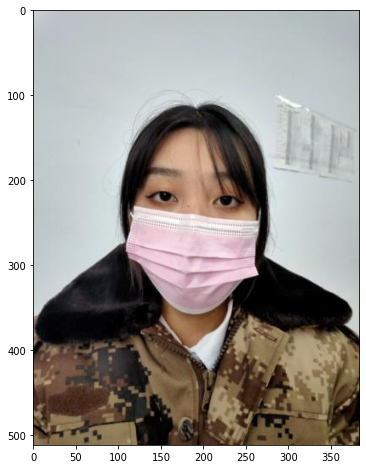

In [4]:
fig, ax = plt.subplots(1,1, figsize=(16, 8))

ax.imshow(img)

* flip, resize
  

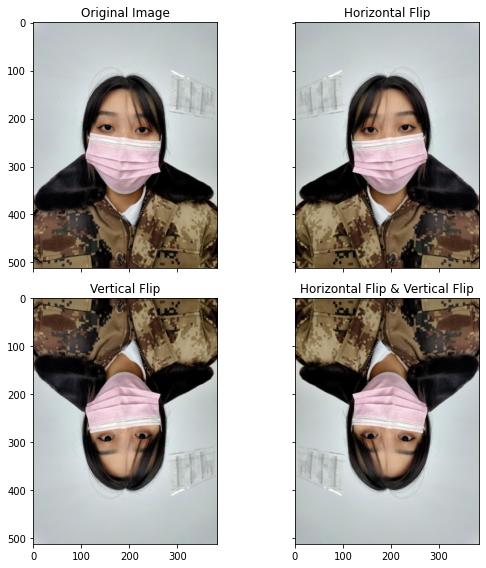

In [5]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

axes[0][0].imshow(img)
axes[0][0].set_title(f'Original Image')

trfm = Compose([
            HorizontalFlip(p=1.0),
        ], p=1.0)
axes[0][1].imshow(trfm(image=img)['image'])
axes[0][1].set_title(f'Horizontal Flip')

trfm = Compose([
            VerticalFlip(p=1.0),
        ], p=1.0)
axes[1][0].imshow(trfm(image=img)['image'])
axes[1][0].set_title(f'Vertical Flip')

trfm = Compose([
            HorizontalFlip(p=1.0),
            VerticalFlip(p=1.0),
        ], p=1.0)
axes[1][1].imshow(trfm(image=img)['image'])
axes[1][1].set_title(f'Horizontal Flip & Vertical Flip')

plt.tight_layout()